In [1]:
import requests
import pandas as pd
import matplotlib
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
#API Set-Up
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()

In [2]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
elements_df = pd.DataFrame(json['elements'])
element_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])


In [4]:
main_df = elements_df[['web_name','first_name','team','element_type','now_cost','selected_by_percent','transfers_in','transfers_out','form','event_points','total_points','bonus','points_per_game','value_season','minutes','goals_scored','assists','ict_index','clean_sheets','saves']]


In [5]:
element_types_df.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],80
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],244
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],288
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],91


In [6]:
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1200,1250,1130,1150,1220,1210,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1100,1160,1120,1140,1080,1100,2
2,36,0,None,3,0,Brighton,0,0,0,BHA,...,None,False,0,1130,1130,1150,1190,1100,1130,131
3,90,0,None,4,0,Burnley,0,0,0,BUR,...,None,False,0,1060,1070,1040,1090,1040,1080,43
4,8,0,None,5,0,Chelsea,0,0,0,CHE,...,None,False,0,1250,1280,1260,1300,1250,1310,4


In [7]:
#create new dictionary
games_played = [['Arsenal','4'], ['Aston Villa','3'], ['Brighton','4'], ['Burnley','3'], ['Chelsea','4'], ['Crystal Palace','4'], ['Everton','4'], ['Fulham','4'], ['Leicester','4'], ['Leeds','4'], ['Liverpool','4'], ['Man City','3'], ['Man Utd','3'], ['Newcastle','4'], ['Sheffield Utd','4'], ['Southampton','4'], ['Spurs','4'], ['West Brom','4'], ['West Ham','4'], ['Wolves','4']]

In [8]:
#turn into a DataFrame
played_df = pd.DataFrame(games_played,columns=['team','games_played'])

In [9]:
#overwrite existing DataFrame column
teams_df['played'] = played_df['games_played'].astype(str).astype(int)
#voila
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,4,0,0,ARS,...,None,False,0,1200,1250,1130,1150,1220,1210,1
1,7,0,None,2,0,Aston Villa,3,0,0,AVL,...,None,False,0,1100,1160,1120,1140,1080,1100,2
2,36,0,None,3,0,Brighton,4,0,0,BHA,...,None,False,0,1130,1130,1150,1190,1100,1130,131
3,90,0,None,4,0,Burnley,3,0,0,BUR,...,None,False,0,1060,1070,1040,1090,1040,1080,43
4,8,0,None,5,0,Chelsea,4,0,0,CHE,...,None,False,0,1250,1280,1260,1300,1250,1310,4


In [10]:
#merging elements_types_df onto main_df
main_df = pd.merge(left=main_df,right=element_types_df[['id','singular_name']],left_on='element_type', right_on='id', how='left')

In [11]:
main_df = main_df.drop(["id", "element_type"],axis=1)

In [12]:
main_df = main_df.rename(columns = {'singular_name': 'position'})

In [13]:
#merging teams_df onto main_df
main_df = pd.merge(left=main_df,right=teams_df[['id','name','played','strength_overall_away','strength_overall_home']],left_on='team', right_on='id', how='left')
main_df = main_df.drop(["id", "team"],axis=1)
main_df = main_df.rename(columns = {'name': 'team'})

In [14]:
#Additional columns stored as floats
main_df['value'] = main_df.value_season.astype(float)
main_df['ict_score'] = main_df.ict_index.astype(float)
main_df['selection_percentage'] = main_df.selected_by_percent.astype(float)
main_df['current_form'] = main_df.form.astype(float)
#Total Goals Contribution column = Goals + Assists
main_df['total_contribution']= main_df['goals_scored'] + main_df['assists']

In [15]:
main_df = main_df.loc[main_df.value > 0]
#preview of current state
main_df.head(3)

,web_name,first_name,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,total_points,bonus,...,position,team,played,strength_overall_away,strength_overall_home,value,ict_score,selection_percentage,current_form,total_contribution
2,David Luiz,David,54,0.8,77139,130431,0.2,0,41,0,...,Defender,Arsenal,4,1250,1200,7.6,43.9,0.8,0.2,1
3,Aubameyang,Pierre-Emerick,113,6.7,1189202,3858824,3.6,0,126,11,...,Midfielder,Arsenal,4,1250,1200,11.2,159.5,6.7,3.6,13
4,Cédric,Cédric,46,0.3,41338,65876,0.0,0,28,3,...,Defender,Arsenal,4,1250,1200,6.1,29.2,0.3,0.0,1


In [16]:
position_group = np.round(main_df.groupby('position', as_index=False).aggregate({'value':np.mean, 'total_points':np.sum}), 2)
position_group.sort_values('value', ascending=False)

,position,value,total_points
2,Goalkeeper,13.61,2732
0,Defender,11.30,9936
3,Midfielder,10.22,12849
1,Forward,8.83,4311


In [17]:
team_group = np.round(main_df.groupby('team', as_index=False).aggregate({'value':np.mean, 'total_points':np.sum}), 2)
team_grp_df = team_group.sort_values('value', ascending=False)
team_grp_df['games_played'] = teams_df['played']
team_grp_df.head(5)

,team,value,total_points,games_played
1,Aston Villa,14.36,1623,3
8,Leeds,14.22,1572,4
18,West Ham,12.93,1554,4
4,Chelsea,12.82,1816,4
11,Man City,12.63,1998,3


In [18]:
team_group = np.round(main_df.groupby('team', as_index=False).aggregate({'value':np.mean, 'total_points':np.sum}), 2)
team_grp_df = team_group
team_grp_df['games_played'] = teams_df['played']
team_grp_df['value_adjusted'] = np.round(team_grp_df['value']/teams_df['played'],2)
team_grp_df['points_adjusted'] = np.round(team_grp_df['total_points']/teams_df['played'],2)
team_grp_df.sort_values('points_adjusted',ascending=False).head(5)

,team,value,total_points,games_played,value_adjusted,points_adjusted
11,Man City,12.63,1998,3,4.21,666.00
12,Man Utd,10.20,1733,3,3.40,577.67
1,Aston Villa,14.36,1623,3,4.79,541.00
4,Chelsea,12.82,1816,4,3.20,454.00
3,Burnley,10.84,1336,3,3.61,445.33


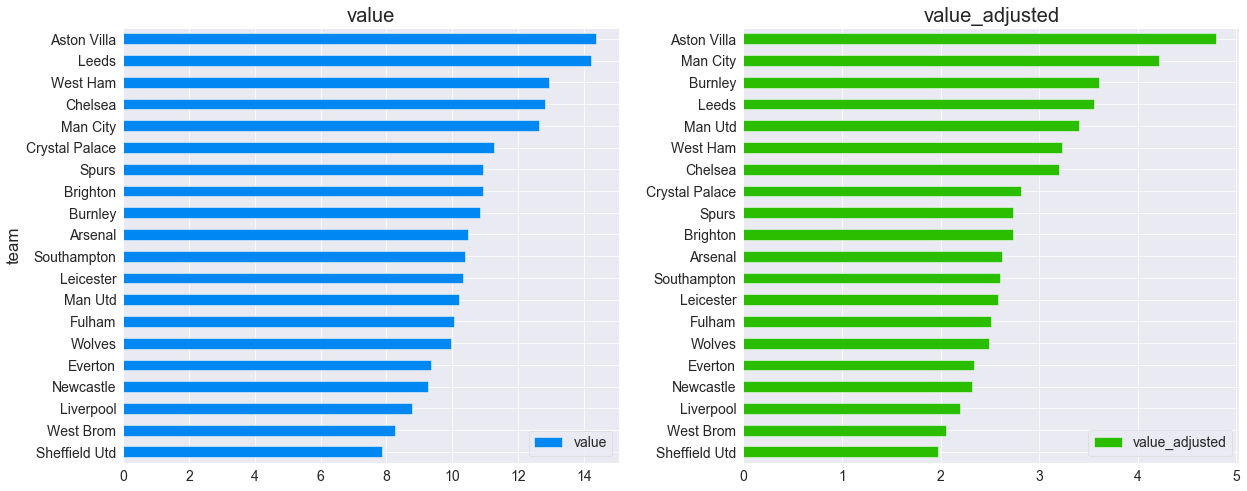

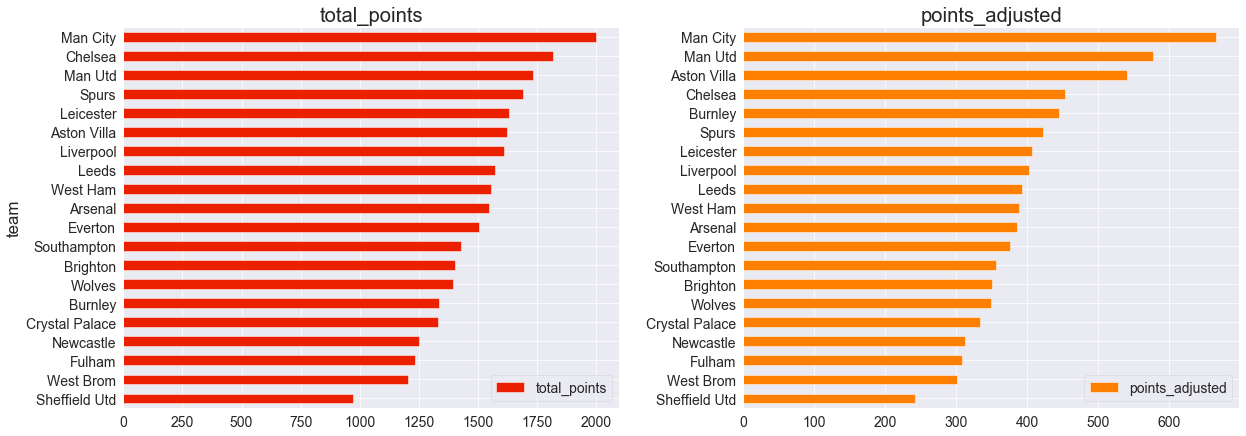

In [19]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
plt.subplots_adjust(hspace=0.25,  wspace=0.25)
team_grp_df.sort_values('value').plot.barh(ax=axes[0],x="team", y="value", subplots=True, color='#0087F1')
team_grp_df.sort_values('value_adjusted').plot.barh(ax=axes[1],x="team", y="value_adjusted", subplots=True, color='#2BBD00')
plt.ylabel("")
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
plt.subplots_adjust(hspace=0.25,  wspace=0.25)
team_grp_df.sort_values('total_points').plot.barh(ax=axes[0],x="team", y="total_points", subplots=True, color='#EB2000')
team_grp_df.sort_values('points_adjusted').plot.barh(ax=axes[1],x="team", y="points_adjusted", subplots=True, color='#FF8000')
plt.ylabel("");


In [20]:
gk_df = main_df.loc[main_df.position == 'Goalkeeper']
gk_df = gk_df[['web_name','team','selection_percentage','now_cost','clean_sheets','saves','bonus','total_points','value']]


In [21]:
topgk_df = gk_df = gk_df.loc[gk_df.value > 18]
topgk_df = topgk_df = topgk_df.loc[topgk_df.total_points > 120 ]

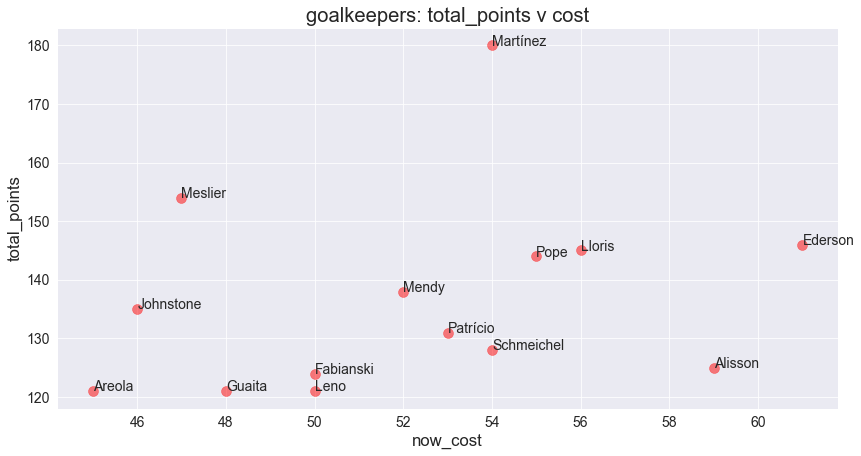

In [22]:
ax = topgk_df.plot.scatter(x='now_cost',y='total_points',s=100, alpha=.5, figsize=(14,7),color="Red", title="goalkeepers: total_points v cost")
for i, txt in enumerate(topgk_df.web_name):
    ax.annotate(txt, (topgk_df.now_cost.iat[i],topgk_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()

In [23]:
def_df = main_df.loc[main_df.position == 'Defender']
def_df = def_df[['web_name','team','selection_percentage','now_cost','clean_sheets','assists','goals_scored','total_contribution','ict_score','bonus','total_points','value']]


In [24]:
def_df.sort_values('total_points',ascending=False).head(5)


,web_name,team,selection_percentage,now_cost,clean_sheets,assists,goals_scored,total_contribution,ict_score,bonus,total_points,value
318,Dallas,Leeds,30.4,54,11,3,8,11,168.5,15,164,30.4
365,Alexander-Arnold,Liverpool,24.4,77,8,8,2,10,241.5,26,149,19.4
441,Wan-Bissaka,Man Utd,18.5,57,13,5,2,7,138.9,11,142,24.9
638,Cresswell,West Ham,16.6,56,10,10,0,10,154.8,21,142,25.4
395,Cancelo,Man City,13.8,58,14,4,2,6,163.7,18,141,24.3


In [25]:
topdef_df = def_df = def_df.loc[def_df.value > 18]
topdef_df = topdef_df = topdef_df.loc[def_df.total_points > 120 ]

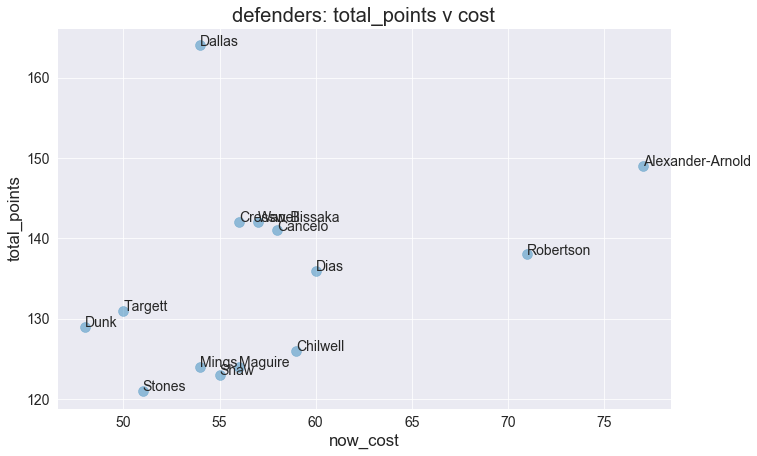

In [26]:
ax = topdef_df.plot.scatter(x='now_cost',y='total_points',s=100, alpha=.5, figsize=(11,7), title="defenders: total_points v cost")
for i, txt in enumerate(topdef_df.web_name):
    ax.annotate(txt, (topdef_df.now_cost.iat[i],topdef_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()

In [27]:
unluckydef_df = def_df.loc[def_df.ict_score > 150]
unluckydef_df.sort_values('ict_score', ascending=False).head(5)

,web_name,team,selection_percentage,now_cost,clean_sheets,assists,goals_scored,total_contribution,ict_score,bonus,total_points,value
365,Alexander-Arnold,Liverpool,24.4,77,8,8,2,10,241.5,26,149,19.4
362,Robertson,Liverpool,14.8,71,10,6,1,7,202.9,14,138,19.4
429,Shaw,Man Utd,17.9,55,10,5,1,6,191.6,22,123,22.4
318,Dallas,Leeds,30.4,54,11,3,8,11,168.5,15,164,30.4
395,Cancelo,Man City,13.8,58,14,4,2,6,163.7,18,141,24.3


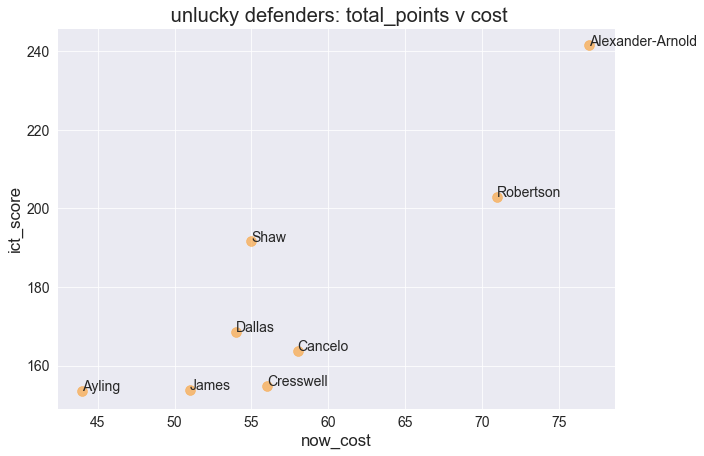

In [28]:
ax = unluckydef_df.plot.scatter(x='now_cost',y='ict_score',s=100, alpha=.5, figsize=(10,7),color="DarkOrange", title=" unlucky defenders: total_points v cost")
for i, txt in enumerate(unluckydef_df.web_name):
    ax.annotate(txt, (unluckydef_df.now_cost.iat[i],unluckydef_df.ict_score.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()

In [29]:
##midfield

In [30]:
mid_df = main_df.loc[main_df.position == 'Midfielder']
mid_df = mid_df[['web_name','team','selection_percentage','now_cost','assists','goals_scored','total_contribution','ict_score','current_form','bonus','total_points','value']]


In [31]:
topmid_df = mid_df.loc[mid_df.ict_score > 250]
topmid_df = topmid_df.loc[mid_df.total_points > 145]
topmid_df.sort_values('total_points',ascending=False)

,web_name,team,selection_percentage,now_cost,assists,goals_scored,total_contribution,ict_score,current_form,bonus,total_points,value
430,Fernandes,Man Utd,51.3,114,13,18,31,387.5,4.8,36,240,21.1
361,Salah,Liverpool,39.7,128,5,22,27,362.7,6.6,21,222,17.3
567,Son,Spurs,46.9,97,10,17,27,302.7,8.0,26,221,22.8
434,Rashford,Man Utd,10.6,96,11,11,22,259.8,4.6,9,173,18.0
358,Mané,Liverpool,5.9,117,10,9,19,285.2,5.4,11,154,13.2


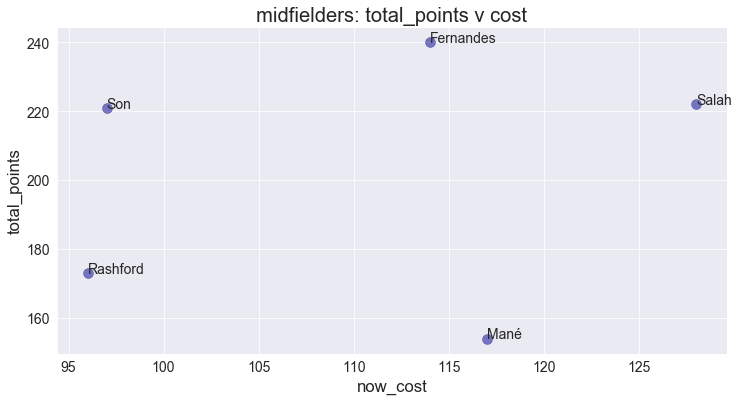

In [32]:
ax = topmid_df.plot.scatter(x='now_cost',y='total_points',s=100, alpha=.5,color="DarkBlue", figsize=(12,6), title="midfielders: total_points v cost")
for i, txt in enumerate(topmid_df.web_name):
    ax.annotate(txt, (topmid_df.now_cost.iat[i],topmid_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()

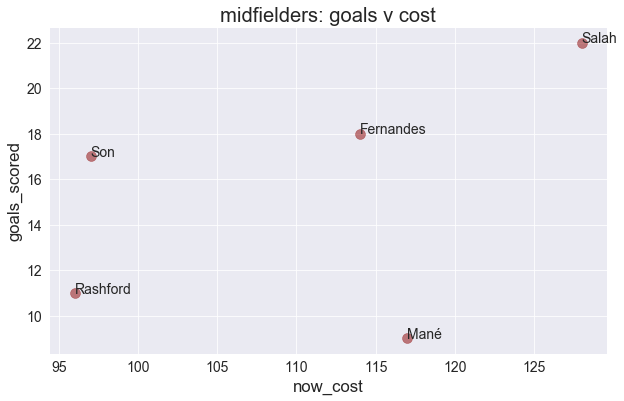

In [33]:
ax = topmid_df.plot.scatter(x='now_cost',y='goals_scored',s=100,color="DarkRed", alpha=.5, figsize=(10,6), title="midfielders: goals v cost")
for i, txt in enumerate(topmid_df.web_name):
    ax.annotate(txt, (topmid_df.now_cost.iat[i],topmid_df.goals_scored.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()

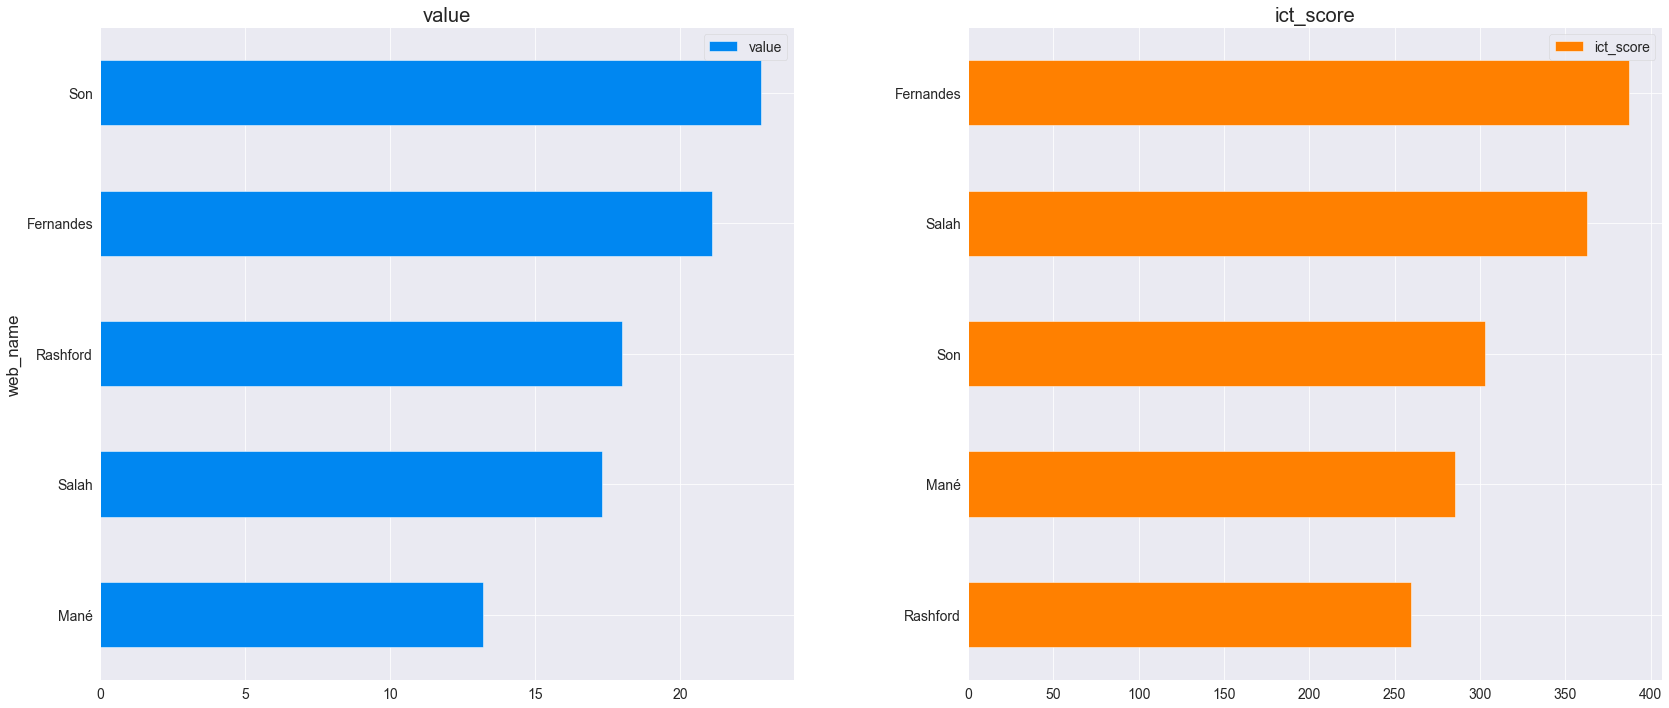

In [34]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(28,12))
plt.subplots_adjust(hspace=0.25,  wspace=0.25)
topmid_df.sort_values('value').plot.barh(ax=axes[0],x="web_name", y="value", subplots=True, color='#0087F1')
topmid_df.sort_values('ict_score').plot.barh(ax=axes[1],x="web_name", y="ict_score", subplots=True, color='#FF8000')
plt.ylabel("");



In [35]:
fwd_df = main_df.loc[main_df.position == 'Forward']
fwd_df = fwd_df[['web_name','team','selection_percentage','now_cost','assists','goals_scored','total_contribution','ict_score','current_form','minutes','bonus','total_points','value']]

In [36]:
topfwd_df = fwd_df[fwd_df.total_contribution > 0]

In [37]:
fwd_df


,web_name,team,selection_percentage,now_cost,assists,goals_scored,total_contribution,ict_score,current_form,minutes,bonus,total_points,value
5,Lacazette,Arsenal,4.3,84,3,13,16,170.3,0.8,1905,21,128,15.2
18,Nketiah,Arsenal,0.5,53,1,2,3,42.1,1.6,411,5,36,6.8
55,Wesley,Aston Villa,0.0,60,0,0,0,2.3,0.5,15,0,3,0.5
57,Davis,Aston Villa,7.7,42,1,1,2,31.7,1.8,265,0,23,5.5
62,Watkins,Aston Villa,24.7,64,9,13,22,296.3,3.7,3148,15,157,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,Haller,West Ham,0.2,61,0,3,3,66.2,0.0,932,4,41,6.7
669,Jiménez,Wolves,4.4,81,1,4,5,55.0,0.0,824,7,43,5.3
685,Fabio Silva,Wolves,1.0,52,2,4,6,101.8,3.4,1172,5,65,12.5
699,Cutrone,Wolves,0.0,59,0,0,0,0.2,0.0,23,0,2,0.3


In [38]:
topfwd_df = fwd_df.loc[fwd_df.ict_score > 120]
topfwd_df = topfwd_df.loc[fwd_df.total_points > 130]
topfwd_df.sort_values('total_points',ascending=False)

,web_name,team,selection_percentage,now_cost,assists,goals_scored,total_contribution,ict_score,current_form,minutes,bonus,total_points,value
565,Kane,Spurs,45.2,118,13,22,35,339.2,3.0,2903,39,230,19.5
320,Bamford,Leeds,41.7,65,10,15,25,250.2,2.8,2917,22,176,27.1
284,Vardy,Leicester,18.1,102,14,13,27,231.7,4.2,2658,20,172,16.9
218,Calvert-Lewin,Everton,34.0,76,6,16,22,237.5,4.6,2691,21,161,21.2
62,Watkins,Aston Villa,24.7,64,9,13,22,296.3,3.7,3148,15,157,24.5
541,Adams,Southampton,5.0,57,7,9,16,198.6,5.2,2617,16,136,23.9
120,Wood,Burnley,4.3,65,3,12,15,192.1,7.2,2561,16,134,20.6
486,Wilson,Newcastle,5.3,65,6,12,18,154.7,3.4,2081,22,134,20.6


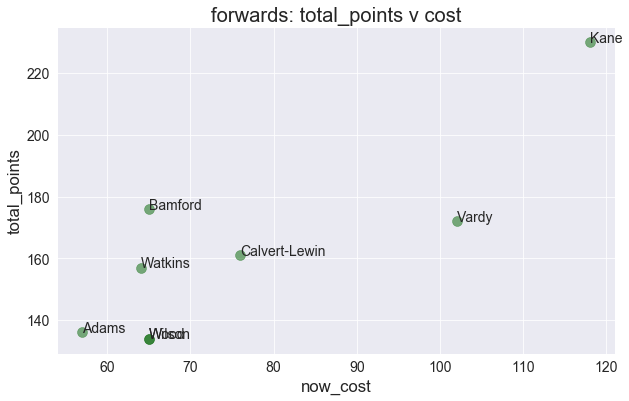

In [39]:
ax = topfwd_df.plot.scatter(x='now_cost',y='total_points',s=100, alpha=.5, figsize=(10,6),color="DarkGreen", title="forwards: total_points v cost")
for i, txt in enumerate(topfwd_df.web_name):
    ax.annotate(txt, (topfwd_df.now_cost.iat[i],topfwd_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()

In [40]:
fwd_df['transfers_in'] = main_df['transfers_in']
informfwd_df = fwd_df[fwd_df.current_form > 4]

In [41]:
informfwd_df

,web_name,team,selection_percentage,now_cost,assists,goals_scored,total_contribution,ict_score,current_form,minutes,bonus,total_points,value,transfers_in
98,Welbeck,Brighton,0.8,55,4,6,10,117.7,5.4,1513,15,88,16.0,292678
120,Wood,Burnley,4.3,65,3,12,15,192.1,7.2,2561,16,134,20.6,668105
177,Benteke,Crystal Palace,1.5,55,2,9,11,165.9,5.2,1730,13,100,18.2,283379
218,Calvert-Lewin,Everton,34.0,76,6,16,22,237.5,4.6,2691,21,161,21.2,9002244
284,Vardy,Leicester,18.1,102,14,13,27,231.7,4.2,2658,20,172,16.9,5142247
292,Iheanacho,Leicester,19.3,62,2,11,13,164.3,6.4,1332,17,102,16.5,2336945
356,Firmino,Liverpool,3.9,90,7,8,15,258.9,4.4,2667,13,128,14.2,1119619
541,Adams,Southampton,5.0,57,7,9,16,198.6,5.2,2617,16,136,23.9,1762277


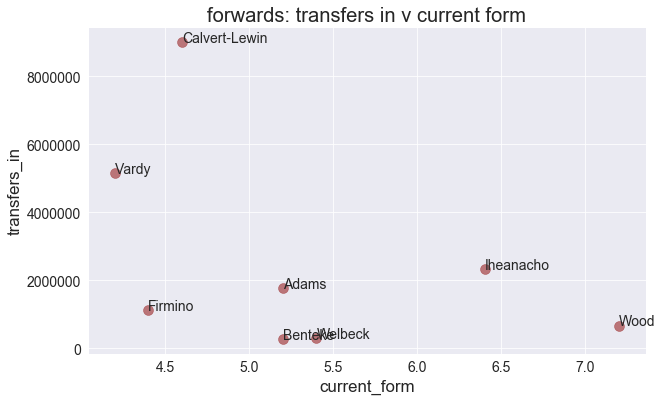

In [42]:
ax = informfwd_df.plot.scatter(x='current_form',y='transfers_in',s=100,color='DarkRed', alpha=.5, figsize=(10,6), title="forwards: transfers in v current form")
for i, txt in enumerate(informfwd_df.web_name):
    ax.annotate(txt, (informfwd_df.current_form.iat[i],informfwd_df.transfers_in.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()

In [43]:
##overall analysis

In [44]:
top5_gk_df = gk_df.nlargest(5, 'value')
top5_def_df = def_df.nlargest(5, 'value')
top5_mid_df = mid_df.nlargest(5, 'value')
top5_fwd_df = fwd_df.nlargest(5, 'value')

In [45]:
top5_gk_df

,web_name,team,selection_percentage,now_cost,clean_sheets,saves,bonus,total_points,value
34,Martínez,Aston Villa,39.3,54,15,133,27,180,33.3
331,Meslier,Leeds,7.9,47,11,140,20,154,32.8
606,Johnstone,West Brom,3.0,46,6,154,19,135,29.3
266,Areola,Fulham,4.6,45,9,111,8,121,26.9
165,Mendy,Chelsea,10.3,52,16,54,8,138,26.5


In [46]:
top5_def_df

,web_name,team,selection_percentage,now_cost,clean_sheets,assists,goals_scored,total_contribution,ict_score,bonus,total_points,value
318,Dallas,Leeds,30.4,54,11,3,8,11,168.5,15,164,30.4
76,Dunk,Brighton,6.4,48,11,0,5,5,127.6,17,129,26.9
49,Targett,Aston Villa,12.9,50,16,3,0,3,133.6,9,131,26.2
638,Cresswell,West Ham,16.6,56,10,10,0,10,154.8,21,142,25.4
441,Wan-Bissaka,Man Utd,18.5,57,13,5,2,7,138.9,11,142,24.9


In [47]:
top5_mid_df

,web_name,team,selection_percentage,now_cost,assists,goals_scored,total_contribution,ict_score,current_form,bonus,total_points,value
321,Harrison,Leeds,4.1,55,9,8,17,222.0,5.6,15,152,27.6
617,Pereira,West Brom,5.2,54,7,10,17,216.6,5.2,15,146,27.0
389,Gündogan,Man City,18.5,56,4,12,16,205.8,1.8,21,150,26.8
651,Soucek,West Ham,11.2,52,2,9,11,193.8,1.8,15,136,26.2
535,Ward-Prowse,Southampton,12.6,59,7,8,15,212.5,5.0,17,152,25.8


In [48]:
top5_fwd_df

,web_name,team,selection_percentage,now_cost,assists,goals_scored,total_contribution,ict_score,current_form,minutes,bonus,total_points,value,transfers_in
320,Bamford,Leeds,41.7,65,10,15,25,250.2,2.8,2917,22,176,27.1,7784889
62,Watkins,Aston Villa,24.7,64,9,13,22,296.3,3.7,3148,15,157,24.5,4600468
541,Adams,Southampton,5.0,57,7,9,16,198.6,5.2,2617,16,136,23.9,1762277
218,Calvert-Lewin,Everton,34.0,76,6,16,22,237.5,4.6,2691,21,161,21.2,9002244
120,Wood,Burnley,4.3,65,3,12,15,192.1,7.2,2561,16,134,20.6,668105


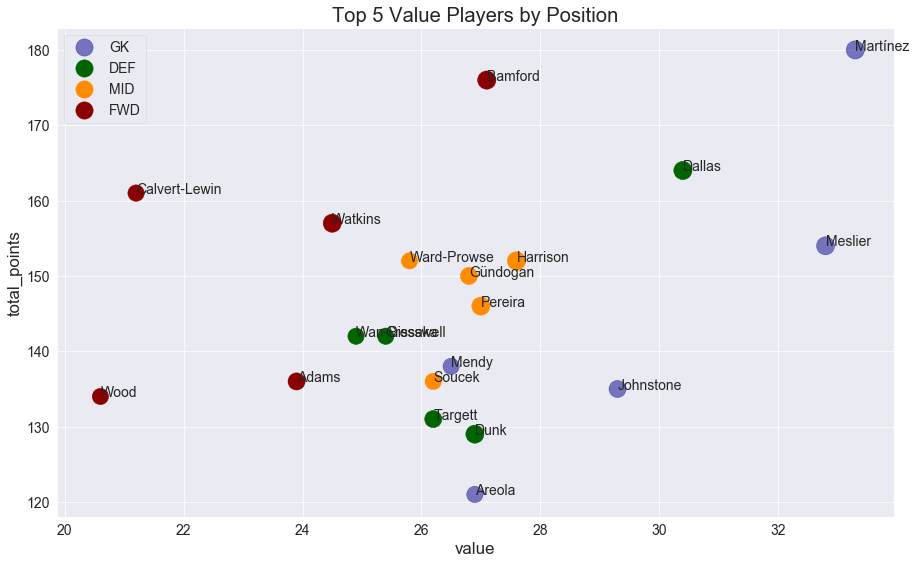

In [49]:
ax = top5_gk_df.plot.scatter(x='value', y='total_points', color='DarkBlue', label='GK', s=top5_gk_df['value']*10, alpha=.5, figsize=(15,9), title="Top 5 Value Players by Position")
for i, txt in enumerate(top5_gk_df.web_name):
    ax.annotate(txt, (top5_gk_df.value.iat[i],top5_gk_df.total_points.iat[i]))
top5_def_df.plot.scatter(x='value', y='total_points', color='DarkGreen', label='DEF', s=top5_gk_df['value']*10, ax=ax)
for i, txt in enumerate(top5_def_df.web_name):
    ax.annotate(txt, (top5_def_df.value.iat[i],top5_def_df.total_points.iat[i]))
top5_mid_df.plot.scatter(x='value', y='total_points', color='DarkOrange', label='MID', s=top5_gk_df['value']*10, ax=ax)
for i, txt in enumerate(top5_mid_df.web_name):
    ax.annotate(txt, (top5_mid_df.value.iat[i],top5_mid_df.total_points.iat[i]))
top5_fwd_df.plot.scatter(x='value', y='total_points', color='DarkRed', label='FWD', s=top5_gk_df['value']*10, ax=ax)
for i, txt in enumerate(top5_fwd_df.web_name):
    ax.annotate(txt, (top5_fwd_df.value.iat[i],top5_fwd_df.total_points.iat[i]))

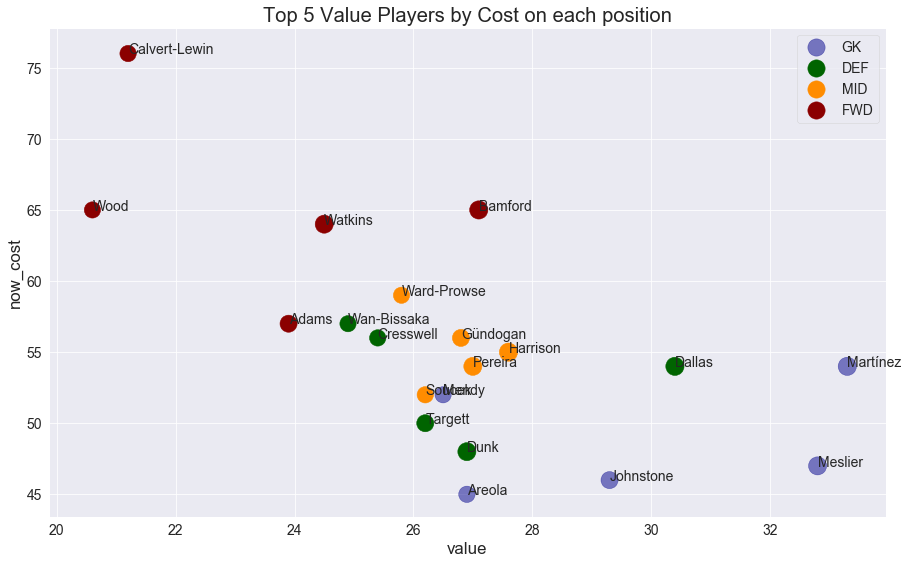

In [50]:
ax = top5_gk_df.plot.scatter(x='value', y='now_cost', color='DarkBlue', label='GK', s=top5_gk_df['value']*10, alpha=.5, figsize=(15,9), title="Top 5 Value Players by Cost on each position")
for i, txt in enumerate(top5_gk_df.web_name):
    ax.annotate(txt, (top5_gk_df.value.iat[i],top5_gk_df.now_cost.iat[i]))
top5_def_df.plot.scatter(x='value', y='now_cost', color='DarkGreen', label='DEF', s=top5_gk_df['value']*10, ax=ax)
for i, txt in enumerate(top5_def_df.web_name):
    ax.annotate(txt, (top5_def_df.value.iat[i],top5_def_df.now_cost.iat[i]))
top5_mid_df.plot.scatter(x='value', y='now_cost', color='DarkOrange', label='MID', s=top5_gk_df['value']*10, ax=ax)
for i, txt in enumerate(top5_mid_df.web_name):
    ax.annotate(txt, (top5_mid_df.value.iat[i],top5_mid_df.now_cost.iat[i]))
top5_fwd_df.plot.scatter(x='value', y='now_cost', color='DarkRed', label='FWD', s=top5_gk_df['value']*10, ax=ax)
for i, txt in enumerate(top5_fwd_df.web_name):
    ax.annotate(txt, (top5_fwd_df.value.iat[i],top5_fwd_df.now_cost.iat[i]))